Cette première session de NLP va vous donner les bases de la manipulation de texte en vue du data challenge qui vous attend après l'été !

In [1]:
!pip install spacy
!python -m spacy download fr_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


In [2]:
import spacy

# Preprocessing avec spacy

## Chargement de la librairie

- Créer l'objet `nlp` en important le modèle `fr_core_news_md`
- Créer un `doc`
- Afficher son texte

In [3]:
#######################
### 3 : Pas terrible parce qu'on ne sait pas quel modèle on charge
# from spacy.lang.fr import French
# nlp = French()

### 2 : mieux mais plus verbeux, et on ne peut pas spécifier de chemin vers le modèle
# import fr_core_news_md
# nlp = fr_core_news_md.load()
#######################

### 3 : C'est la bonne
# Créez l'objet nlp
nlp = spacy.load('fr_core_news_md')

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(doc.text)

Ceci est une phrase narcissique puisqu'elle ne parle que d'elle-même.


**L'objet NLP**

- contient le 'pipeline' des calculs
- inclut des règles spécifiques au langage pour la tokenization, etc.

**L'objet doc**

Contient un document, c'est-à-dire un ensemble de *tokens*.

### Manipulation d'un objet `Doc`

L'objet `Doc`se manipule comme une liste. 

A l'aide des `[]`:
- Accedez au premier token de doc
- Selectionnez les mots `'est une'` dans une slice
- Selectionnez les mots entre `'est une phrase narcissique'` dans une slice

In [4]:
# A slice of the Doc for 'est une'
est_une = doc[1:3]
print(est_une.text)

# A slice of the Doc for 'est une phrase narcissique'
est_une_phrase_narcissique = doc[1:5]
print(est_une_phrase_narcissique.text)

est une
est une phrase narcissique


### Tokenisation

In [5]:
text = """L'apprentissage de la data science requiert de ne pas se décourager.
Les défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!"""

# L'objet "nlp" est utilisé pour créer un document avec des annotations linguistiques
doc = nlp(text)

In [6]:
# Tokenization de mots

# Créer la liste des tokens de mots
token_list = []
for token in doc:
    token_list.append(token.text)
print(token_list)

["L'", 'apprentissage', 'de', 'la', 'data', 'science', 'requiert', 'de', 'ne', 'pas', 'se', 'décourager', '.', '\n', 'Les', 'défis', 'et', 'les', 'revers', 'ne', 'sont', 'pas', 'des', 'échecs', ',', 'ils', 'font', 'simplement', 'partie', 'du', 'voyage', '!']


#### Exercice

Dans cet exemple, vous allez utiliser les objets `Doc` et `Token` de spaCy, et des attributs lexicaux pour identifier des pourcentages dans un texte. Vous devez chercher deux tokens qui se suivent: un nombre et un signe pourcentage.

- Utiliser l'attribut de token `like_num` pour voir si le token dans le document ressemble à un nombre.
- Lire le token qui suit immédiatement ce token. L'index du token suivant dans le `doc` est `token.i + 1`.
- Regarder si l'attribut `text` du token suivant est un signe `”%“`.

In [7]:
# Process the text
doc = nlp(
    "En 1990, plus de 60% de la population d'Asie orientale vivait dans l'extrême pauvreté. "
    "Cela représente désormais moins de 4%."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Pourcentage trouvé:", token.text)

Pourcentage trouvé: 60
Pourcentage trouvé: 4


### Suppression des stop words

In [8]:
from spacy.lang.fr.stop_words import STOP_WORDS

print(list(STOP_WORDS)[:10])

['nôtres', 'sinon', 'avoir', 'quelles', 'restant', 'soi-même', 'ceux-là', 'même', "d'", 'afin']


In [9]:
#Implémentation des stop words:
filtered_sent=[]

#  L'objet "nlp" est utilisé pour créer des documents avec annotations
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop == False and word.is_punct == False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [apprentissage, data, science, requiert, décourager, 
, défis, revers, échecs, simplement, partie, voyage]


In [10]:
doc = nlp(text)
tokens = [token for token in doc if not token.text in STOP_WORDS and not token.is_punct]
print(tokens)

[L', apprentissage, data, science, requiert, décourager, 
, Les, défis, revers, échecs, simplement, partie, voyage]


### Lemmatisation

In [11]:
# Implémenter la lemmatization en anglais

doc = nlp("Enedis entretient plus d'1,34 million de kilomètres de câbles électriques.")

for word in doc:
    print(word, word.lemma_)

Enedis Enedis
entretient entretenir
plus plus
d'1,34 d'1,34
million million
de de
kilomètres kilomètre
de de
câbles câble
électriques électrique
. .


In [12]:
!pip install spacy-lefff

In [13]:
# Implémenter la lemmatization en français
from spacy_lefff import LefffLemmatizer, POSTagger

## Sans POStagger
# nlp = spacy.load('fr_core_news_md')
# french_lemmatizer = LefffLemmatizer(default=True)
# nlp.add_pipe(french_lemmatizer, name='lefff')

## Avec POStagger
pos = POSTagger()
french_lemmatizer = LefffLemmatizer(after_melt = True, default = True)
nlp.add_pipe(pos, name='pos')
nlp.add_pipe(french_lemmatizer, name='lefff', after='pos')

doc = nlp("Enedis entretient plus d'1,34 million de kilomètres de câbles électriques.")

for word in doc:
    print(word.text, word._.lefff_lemma)

2020-09-24 09:18:47,049 - spacy_lefff.downloader - INFO - data already set up
2020-09-24 09:18:47,051 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading lexicon...
2020-09-24 09:18:48,180 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading tags...
2020-09-24 09:18:48,234 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from /srv/conda/envs/notebook/lib/python3.7/site-packages/spacy_lefff/data/tagger/models/fr...
2020-09-24 09:18:49,733 - spacy_lefff.melt_tagger - INFO -   TAGGER: Loading model from /srv/conda/envs/notebook/lib/python3.7/site-packages/spacy_lefff/data/tagger/models/fr: done
2020-09-24 09:18:49,735 - spacy_lefff.lefff - INFO - New LefffLemmatizer instantiated.
2020-09-24 09:18:49,737 - spacy_lefff.lefff - INFO - Reading lefff data...
2020-09-24 09:18:50,798 - spacy_lefff.lefff - INFO - Successfully loaded lefff lemmatizer
2020-09-24 09:18:50,819 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Enedis enedis
entretient entretenir
plus plus
d'1,34 d

### Etiquetage morpho-syntaxique (POS tags)

**Que sont les modèles statistiques ?**

- Ils permettent à spaCy de prédir les attributs linguistiques dans un contexte
    - Tags Part-of-speech (POS)
    - Dépendances syntaxiques
    - Entités nommées
- Ils sont entraînés sur des textes labellisés
- Ils peuvent être mis à jour avec des exemples additionnels

In [14]:
from spacy import displacy

In [15]:
doc = nlp("Elle a mangé la pizza")

for token in doc:
    # Afficher le texte et les 'part-of-speech' tags
    print(token.text, token.pos_)

2020-09-24 09:18:50,892 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Elle PRON
a AUX
mangé VERB
la DET
pizza NOUN


In [16]:
spacy.explain("PRON")

'pronoun'

### Analyse des dépendances

In [17]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

displacy.render(doc, style="dep")

Elle PRON nsubj mangé
a AUX aux:tense mangé
mangé VERB ROOT mangé
la DET det pizza
pizza NOUN obj mangé


In [18]:
spacy.explain("nsubj")

'nominal subject'

In [19]:
# Choisir une phrase et demander à spaCy d'afficher les POS tags et les relations entre les mots

doc = nlp("En France les compteurs intelligents seront bientôt entièrement déployés.")

for token in doc:
    print(token.text, token.pos_, token.dep_)

# Tester les styles 'dep' et 'ent'
displacy.render(doc, style="dep")

2020-09-24 09:18:51,004 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
En ADP case
France PROPN obl:mod
les DET det
compteurs NOUN nsubj:pass
intelligents ADJ amod
seront AUX aux:pass
bientôt ADV advmod
entièrement ADV advmod
déployés VERB ROOT
. PUNCT punct


In [20]:
# Choisir une phrase et demander à spaCy d'afficher les POS tags et les relations entre les mots

doc = nlp("En France les compteurs intelligents seront bientôt entièrement déployés.")

for token in doc:
    print(token.text, token.pos_, token.dep_)

# Changer la couleur en bleu et demander à spaCy d'afficher les groupes nominaux comme un même ensemble
displacy.render(doc, style="dep", options = {"color": "blue", "collapse_phrases" : True})

2020-09-24 09:18:51,436 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
En ADP case
France PROPN obl:mod
les DET det
compteurs NOUN nsubj:pass
intelligents ADJ amod
seront AUX aux:pass
bientôt ADV advmod
entièrement ADV advmod
déployés VERB ROOT
. PUNCT punct


### Détection d'entités

In [21]:
# Process a text
doc = nlp("Enedis cherche de nouveaux bureaux à Vaison-La-Romaine "
          "avec l'aide de François Cordel.")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)
    
displacy.render(doc, style="ent")

2020-09-24 09:18:51,499 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Enedis ORG
Vaison-La-Romaine LOC
François Cordel PER


In [22]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [23]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

In [24]:
spacy.explain("PER")

'Named person or family.'

### Chunking : noun chunks

In [25]:
doc = nlp("Il est important pour les utilisateurs de véhicules électriques de disposer facilement "
          "d'infrastructures de recharge pratiques.")

for chunk in doc.noun_chunks:
    print("Groupe nominal :", chunk.text, "; Nom : ", chunk.root.text, "\n")

2020-09-24 09:18:51,614 - spacy_lefff.melt_tagger - INFO -   TAGGER: POS Tagging...
Groupe nominal : de véhicules électriques ; Nom :  véhicules 

Groupe nominal : de recharge pratiques ; Nom :  recharge 



# Nuage de mots

## Charger les données

Nous allons scrapper la page wikipedia d'Enedis et créer un nuage de mots pour comprendre ce qu'il ressort de l'article. 

- Utilisez le code suivant pour charger la page

In [26]:
!pip install bs4

In [27]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Enedis")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = []
for p in soup.find_all("p"):
    corpus.append(p.text)

join_corpus = " ".join(corpus)
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
clean_corpus[:70]+"..."

2020-09-24 09:18:53,925 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): fr.wikipedia.org:443
2020-09-24 09:18:54,047 - urllib3.connectionpool - DEBUG - https://fr.wikipedia.org:443 "GET /wiki/Enedis HTTP/1.1" 200 33625


'Enedis, anciennement ERDF (pour Électricité Réseau Distribution France...'

Comme vu précédemment :
- Chargez le parser nlp francais
- Créez un objet doc en appliquant le parser sur la variable `clean_corpus`

In [28]:
nlp = spacy.load('fr_core_news_md')
nlp.add_pipe(french_lemmatizer, name='lefff')

doc = nlp(clean_corpus)

## Tracer un wordcloud brut

- Installez la librairie wordcloud avec `pip install`

In [29]:
!pip install wordcloud

* Utilisez le code suivant pour générer un premier wordcloud avec le texte brut 

2020-09-24 09:19:03,764 - matplotlib - DEBUG - (private) matplotlib data path: /srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/mpl-data
2020-09-24 09:19:03,769 - matplotlib - DEBUG - matplotlib data path: /srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/mpl-data
2020-09-24 09:19:03,782 - matplotlib - DEBUG - CONFIGDIR=/home/jovyan/.config/matplotlib
2020-09-24 09:19:03,787 - matplotlib - DEBUG - matplotlib version 3.3.2
2020-09-24 09:19:03,789 - matplotlib - DEBUG - interactive is False
2020-09-24 09:19:03,790 - matplotlib - DEBUG - platform is linux
2020-09-24 09:19:03,793 - matplotlib - DEBUG - loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat'

2020-09-24 09:19:04,274 - matplotlib - DEBUG - CACHEDIR=/home/jovyan/.cache/matplotlib
2020-09-24 09:19:04,278 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/jovyan/.cache/matplotlib/fontlist-v330.json
2020-09-24 09:19:04,580 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-09-24 09:19:04,588 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


2020-09-24 09:19:05,168 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-09-24 09:19:05,169 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
2020-09-24 09:19:05,170 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
2020-09-24 09:19:05,171 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
2020-09-24 09:19:05,172 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
2020-09-24 09:19:05,174 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
2020-09-24 09:19:05,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Deja

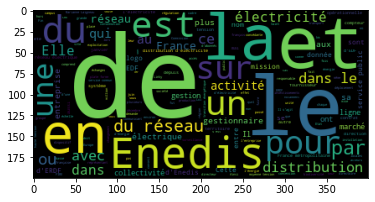

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(doc.text)
plt.imshow(cloud)

## Filtrer les stop words

* Importez maintenant les stop-words présents dans `spacy`

* Faites à nouveau un nuage de mots sans les stop words grâce à l'option `stopwords` du constructeur `WordCloud`

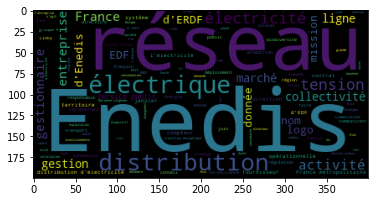

In [31]:
# Import des Stop words
from spacy.lang.fr.stop_words import STOP_WORDS

wd = WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

## Lemmatiser

- Créez une liste `lemma` qui contient les tokens lemmatisés
- Utilisez la fonction `join` pour créer une chaîne de caractère contenant tous les tokens séparés par un espace.

In [32]:
lemma = [token.lemma_ for token in doc]
corpus_lemma = " ".join(lemma)

- Affichez le wordcloud

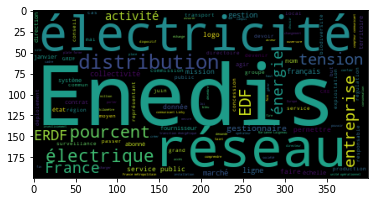

In [33]:
cloud = wd.generate(corpus_lemma)
plt.imshow(cloud)

## Lemmatisation en français

- Même exercice en utilisant le lemmatiseur français

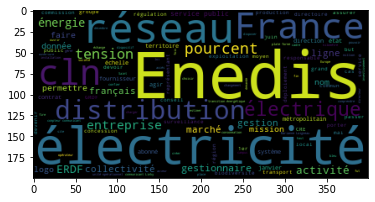

In [34]:
cloud = wd.generate(" ".join([token._.lefff_lemma for token in doc]))
plt.imshow(cloud)

**Remarque**

La lemmatisation est très puissante pour certaines tâches (extraction de sens) mais attention, il y a une perte d'information importante. Pour rechercher une forme par exemple, il vaut mieux utiliser une distance de levenshtein.

# Classification de texte

Dans cette partie, nous allons prendre un peu d'avance sur les formations python et utiliser les librairies `pandas` et `scikit learn` pour faire un exemple simple de classification de texte. Nous utiliserons un jeu de données de commentaires de restaurants en français, l'objectif sera de déterminer si le commentaire est négatif ou positif. 

## Preprocessing

In [35]:
%reset -f

- Importer la librairie `pandas` sous l'allias `pd`
- Utiliser la fonction `pd.read_csv()` pour charger le fichier `restaurant.csv` dans un dataframe `df` (on pourra utiliser l'option `index_col=0` pour indiquer que la première colonne du csv est l'index)
- Afficher les premières  lignes du dataframe en utilisant la fonction `<dataframe>.head()`

In [36]:
!pip install pandas

In [37]:
import pandas as pd

df = pd.read_csv('restaurants.csv', index_col=0)
df.head()

,texte,label_2,label_3
0,"Un service passable .. Des plats surcuits, des...",0,0
1,"Nous avons bien aimé l'ambiance, sur la promen...",1,2
2,"on s'attendait à mieux (attente, qualité moyen...",0,0
3,Une adresse à garder pour soi vue imprenable s...,1,2
4,Une petite dame nous accueille sans le sourire...,0,0


Notre dataframe contient 3 colonnes : 
- `texte` : le texte du commentaire 
- `label_2` : le label du commentaire : 0 si négatif, 1 si positif
- `label_3` : idem : 0 si négatif, 1 si neutre, 2 si positif

Pour l'exemple de classification, nous n'utiliserons que les colonnes `texte` et `label_2`.

- Comme vu dans la partie précédente, importez le parser `French` en utilisant la fonction `load('fr_core_news_md')`
- Ajoutez le lemmatiseur français au parser en utilisant `add_pipe`
- Créez un exemple de document tokenisé `doc` en appliquant le parser sur le premier texte `df.texte[0]`
- Affichez l'exemple `doc`

In [38]:
import spacy
from spacy_lefff import LefffLemmatizer, root

root.setLevel(50)

nlp = spacy.load('fr_core_news_md')
french_lemmatizer = LefffLemmatizer(default=True)
nlp.add_pipe(french_lemmatizer, name='lefff')

doc = nlp(df.texte[0])
print(doc)

Un service passable .. Des plats surcuits, des sauces figées dans leur pot (on se demande si elles n'étaient pas sur d'autres tables avant de nous être servies) , le prix est correct mais le goût n'est pas au rendez vous ... très déçu par ce resto


- Comme vu dans la première partie, supprimez les stop words et la ponctuation en utilisant une list comprehension.
- Stockez le résultat dans une liste `mytokens`

In [39]:
mytokens = [token for token in doc if not token.is_stop and not token.is_punct]
print(mytokens)

[service, passable, plats, surcuits, sauces, figées, pot, demande, tables, servies, prix, correct, goût, rendez, déçu, resto]


- Appliquez à `mytokens`, dans une list comprehension :
    - La lemmatisation via lefff `_.lefff_lemma`
    - Le passage en minuscule en minuscule avec `.lower()`
    - La suppression des espaces avec `.strip()`
- Stockez le résultat dans la même variable `mytokens` et affichez la

In [40]:
mytokens = [word._.lefff_lemma.lower().strip() for word in mytokens ]
print(mytokens)

['service', 'passable', 'plat', 'surcuits', 'sauce', 'figer', 'pot', 'demander', 'table', 'servir', 'prix', 'correct', 'goût', 'rendez', 'décevoir', 'resto']


- Créer la function `spacy_tokenizer` qui prend en entrée un texte et qui effectue les étapes précédentes.

In [41]:
# Création de la fonction de tokenization
def spacy_tokenizer(text):
    # Création du token, utilisé pour créer des documents avec des annotations linguistiques
    doc = nlp(text)
    
    # Suppression des stop words
    mytokens = [token for token in doc if not token.is_stop and not token.is_punct]
    
    # Lemmatisation de chaque token et conversion en caractères minuscules
    mytokens = [word._.lefff_lemma.lower().strip() for word in mytokens ]

    # On retourne la liste des tokens préparés
    return mytokens

## Vectorisation

Pour utiliser des algorithmes de machine learning sur du texte, il est nécessaire de représenter le texte par des valeurs numériques. C'est ce qu'on appelle la vectorisation. La technique la plus simple est le *bag of words* :

**Exemple de Bag of Words**
- Texte 1 : "enedis innovation"
- Texte 2 : "Cordel croissants"
- Texte 3 : "Cordel innovation innovation"

|          | enedis | innovation | Cordel | croissants |
| -------- |: ----: | ---------: |: ----: |: --------: |
| Texte 1  |    1   |          1 |      0 |          0 |
| Texte 2  |    0   |          0 |      1 |          1 |
| Texte 3  |    0   |          2 |      1 |          0 |


Pour enrichir un peu cette représentation, on peut utiliser la TF IDF (Term Frequency - Inverse Document Frequency) à la place d'un simple décompte dans la matrice. Cette technique, bien qu'assez ancienne, est légère et très efficace pour de l'extraction de sens. 

Aujourd'hui, les plus gros progrès en NLP concernent cette étape de vectorisation qui peut être améliorée via l'usage du deep learning notamment. 

In [42]:
!pip install sklearn

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

# Création du bag of words
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1), max_features=None)

# Création de la représentation TF-IDF
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1), max_features=None)

On va maintenant préparer les données pour l'entrainement en selectionnant les colonnes correspondantes et en faisant un split des données.

In [44]:
X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_2'] # les labels, ou réponses, pour lesquels on veut tester notre modèle

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

## Application du modèle

In [45]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# Création du pipeline en utilisant des Bag of Words
pipe = Pipeline([
#     ('cleaner', predictors()),
    ('vectorizer', bow_vector),
    ('classifier', classifier)
])

# Génération du modèle
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7fdb64d37950>)),
                ('classifier', LogisticRegression())])

In [46]:
from sklearn import metrics

# Predicting avec un dataset de test
predicted = pipe.predict(X_test)

# Précision du modèle
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("\nLogistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Confusion matrix:
 [[54 10]
 [ 6 31]]

Logistic Regression Accuracy: 0.8415841584158416


**Remarque**

La qualité des données initiales a un rôle fondamental.

*Exemple*
- `' '.join(sentences)` --> 75% accuracy
- `'. '.join(sentences)` --> 80% accuracy

## T-SNE sur TF-IDF

In [47]:
X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_3'] # les labels, ou réponses, pour lesquels on veut tester notre modèle
print(df.loc[:, ['texte','label_3']])

                                                 texte  label_3
0    Un service passable .. Des plats surcuits, des...        0
1    Nous avons bien aimé l'ambiance, sur la promen...        2
2    on s'attendait à mieux (attente, qualité moyen...        0
3    Une adresse à garder pour soi vue imprenable s...        2
4    Une petite dame nous accueille sans le sourire...        0
..                                                 ...      ...
330  des problèmes digestifs aprés le repas!. j'ai ...        0
331  Alors là, si vous voulez un resto classe, une ...        2
332  Les amis voulaient manger des crêpes mais ... ...        2
333  Dés que nous sommes rentrés dans l’établissent...        0
334  la salle de restaurant fait cantine,la déco es...        0

[335 rows x 2 columns]


In [48]:
# On calcule le tf-idf pour chaque mot de chaque texte
tfidf = tfidf_vector.fit_transform(X)
print(tfidf[0])

  (0, 2108)	0.22621462074436308
  (0, 841)	0.22886025288552864
  (0, 2072)	0.33759571537509775
  (0, 1200)	0.21234335429816198
  (0, 671)	0.19142723990259058
  (0, 1914)	0.14405034879818315
  (0, 2254)	0.19142723990259058
  (0, 2380)	0.19142723990259058
  (0, 757)	0.21234335429816198
  (0, 1884)	0.3237244489288966
  (0, 1076)	0.3554788881366306
  (0, 2214)	0.22886025288552864
  (0, 2352)	0.3806838045058536
  (0, 1843)	0.11884543242896015
  (0, 1767)	0.3237244489288966
  (0, 2250)	0.11930761279229458


In [49]:
# Affichage des résultats pour le premier commentaire

# Premier commentaire
print(df.loc[0, 'texte'])

# TF-IDF pour le premier commentaire
df_tfidf = pd.DataFrame(tfidf[0].T.todense(), index = tfidf_vector.get_feature_names(), columns=["tf_idf"])
df_tfidf.sort_values(by=["tf_idf"],ascending=False)

Un service passable .. Des plats surcuits, des sauces figées dans leur pot (on se demande si elles n'étaient pas sur d'autres tables avant de nous être servies) , le prix est correct mais le goût n'est pas au rendez vous ... très déçu par ce resto


,tf_idf
surcuits,0.380684
figer,0.355479
rendez,0.337596
pot,0.323724
passable,0.323724
...,...
démarquer,0.000000
démonter,0.000000
départ,0.000000
dépasser,0.000000


In [50]:
# Création d'un dataframe regroupant les tf-idf et les labels
df_tfidf = pd.DataFrame(tfidf.todense(), columns = tfidf_vector.get_feature_names())
df_tfidf = pd.concat([df_tfidf, ylabels], axis=1)
print(df_tfidf)

       +  -en  -là  -plat   -t  .repas    0  0,50   00    1  ...  éviter!!!!.  \
0    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
1    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
2    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
3    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
4    0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
..   ...  ...  ...    ...  ...     ...  ...   ...  ...  ...  ...          ...   
330  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
331  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
332  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
333  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   
334  0.0  0.0  0.0    0.0  0.0     0.0  0.0   0.0  0.0  0.0  ...          0.0   

     évolution  évoquer  êt

In [51]:
# t-SNE sur les données
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

tsvd = TruncatedSVD(n_components=50)
tsne = TSNE(n_components=2, init = 'random', verbose=1, perplexity=10, n_iter=1000)

tmp = tsvd.fit_transform(df_tfidf.drop(['label_3'], axis=1))
tsne_results = tsne.fit_transform(tmp)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 335 samples in 0.002s...
[t-SNE] Computed neighbors for 335 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 335 / 335
[t-SNE] Mean sigma: 0.169802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.568825
[t-SNE] KL divergence after 1000 iterations: 1.822069


In [52]:
!pip install seaborn

<AxesSubplot:xlabel='Dim 1', ylabel='Dim 2'>

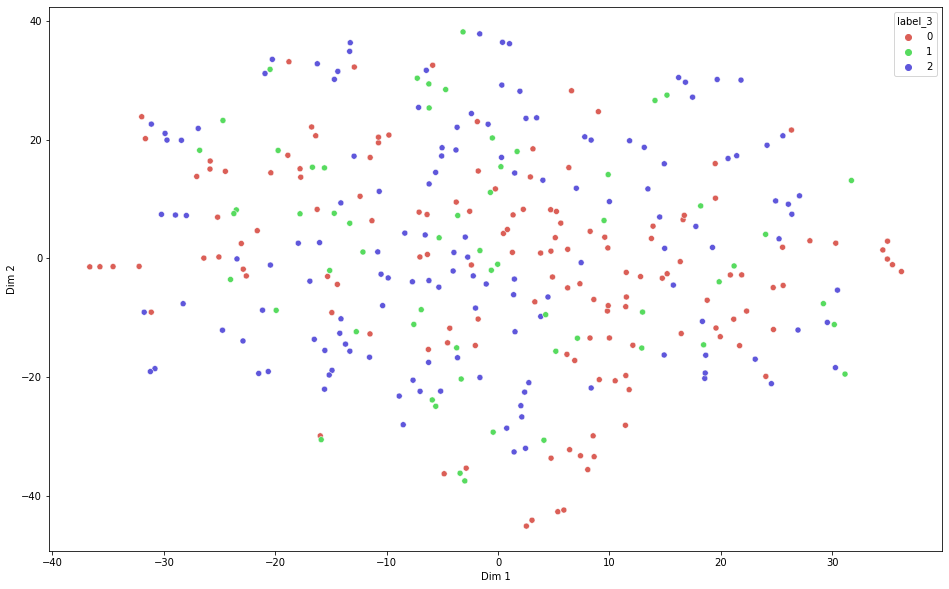

In [53]:
import seaborn as sns

# On considère les deux dimensions les plus importantes
df_tfidf['Dim 1'] = tsne_results[:,0]
df_tfidf['Dim 2'] = tsne_results[:,1]

# On projette les données sur les deux axes, en colorant les points avec les labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "Dim 1", y = "Dim 2",
    hue = "label_3",
    palette = sns.color_palette("hls", 3),
    data = df_tfidf,
    legend = "full",
    alpha = 1.0
)

## Minisom

In [54]:
!pip install minisom

In [55]:
from minisom import MiniSom 
import numpy as np
from matplotlib.gridspec import GridSpec

In [56]:
X = df_tfidf.drop(['label_3'], axis=1)

som = MiniSom(4,4,len(X.columns), sigma= 5, neighborhood_function='mexican_hat')
som.pca_weights_init(X.values)
som.train_batch(X.values, 3000, verbose=True)

/srv/conda/envs/notebook/lib/python3.7/site-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')
/srv/conda/envs/notebook/lib/python3.7/site-packages/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


 [  289 / 3000 ]  10% - 0:00:01 left 

 [ 3000 / 3000 ] 100% - 0:00:00 left 
 quantization error: 8.045936236869702


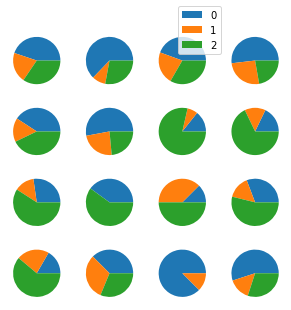

In [57]:
taille_map = 4

labels_map = som.labels_map(X.values, df_tfidf.label_3)
label_names = np.unique(df_tfidf.label_3)
plt.figure(figsize=(5, 5))
the_grid = GridSpec(taille_map, taille_map)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[taille_map-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5))
plt.show()